# Set Up

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import math

In [3]:
case = "2D"
numberOfCases = 6
days = 20
data_path = "../Data/"
#sponge 
cases = [f"sim{case}{i}" for i in range(1, numberOfCases + 1)]
casenames = [f"sim{case}{i}-{days}" for i in range(1, numberOfCases + 1)]

print(f"loading cases {casenames}")

ncs = []

for casename in casenames:
    nc_file = f"{data_path}{casename}_averages.nc"
    ds_avg = xr.open_dataset(nc_file).load()
    ncs.append(ds_avg)
    ds_avg.close()


loading cases ['sim2D1-20', 'sim2D2-20', 'sim2D3-20', 'sim2D4-20', 'sim2D5-20', 'sim2D6-20']


In [4]:
# Load variables
N02 = 9e-5
f = 1e-4
inertial_period = (2*math.pi)/f #s

# Buoyancy Profile

In [13]:
index = 3                  # 0 -> 2D1, 1 -> 2D2, ...
data_set = cases[index]
ds_avg = ncs[index]

print(f"Using data set: {data_set}")

Using data set: sim2D4


## Initial

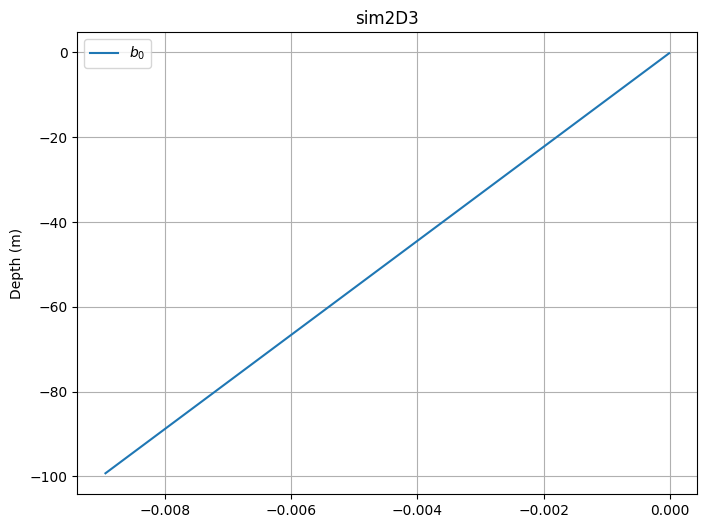

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(ds_avg.b.isel(time=0), ds_avg.zC, label=f"$b_0$")
plt.ylabel('Depth (m)')
plt.legend()
plt.title(data_set)
plt.grid()
plt.show()

## Evolution

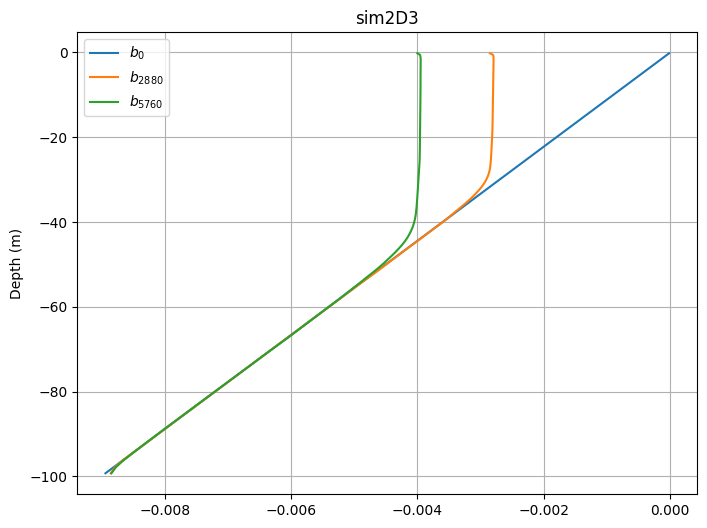

In [12]:
final_time = len(ds_avg.b)-1
middle_time = int(round((final_time) / 2))

plt.figure(figsize=(8, 6))
plt.plot(ds_avg.b.isel(time=0).values, ds_avg.zC, label=f"$b_0$")
plt.plot(ds_avg.b.isel(time=middle_time).values, ds_avg.zC, label=f"$b_{{{middle_time}}}$")
plt.plot(ds_avg.b.isel(time=final_time).values, ds_avg.zC, label=f"$b_{{{final_time}}}$")
plt.ylabel('Depth (m)')
plt.legend()
plt.title(data_set)
plt.grid()
plt.show()

## Evolution Movie

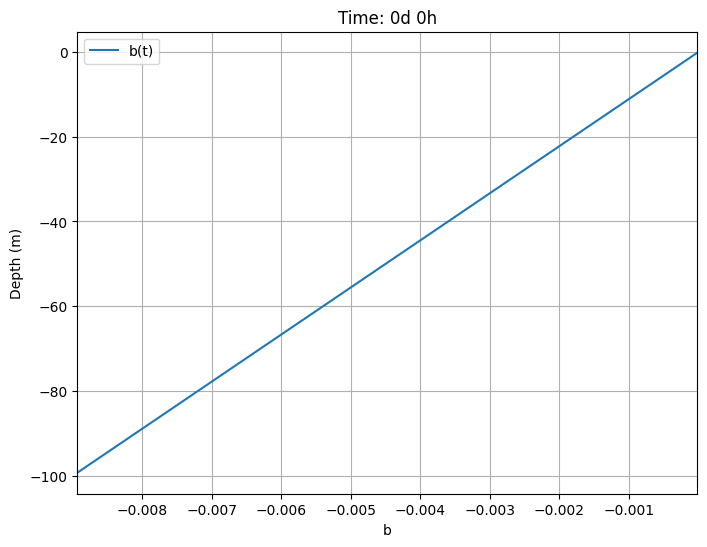

In [70]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

min_value = ds_avg.b.min()
max_value = ds_avg.b.max()

# Define a function to update the plot for each frame
def update(frame):
    ax.cla()  # Clear the current axis
    ax.plot(ds_avg.b.isel(time=frame), ds_avg.zC, label="b(t)")
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('b')
    ax.legend()
    ax.grid()
    
    # Convert time to days, hours, and minutes
    time_in_seconds = pd.to_timedelta(ds_avg.time[frame].values, unit='s')
    days = time_in_seconds.days
    hours, remainder = divmod(time_in_seconds.seconds, 3600)

    ax.set_title(f'{data_set} at time: {days}d {hours}h')
    
    ax.set_xlim(min_value, max_value)

# Create the animation object
ani = animation.FuncAnimation(fig, update, frames=len(ds_avg.time), interval=100, repeat=False)

# Save the animation as a GIF
ani.save(f'images/buoyancy-evaluation-{data_set}.gif', writer='pillow')

# Figure 2

Evolution of the buoyancy frequency normalized by the initial value for a simulation of upright convection (simulation 2D1) and convection at a density front (simulation 2D2).

In [70]:
index = 0                  # 0 -> 2D1, 1 -> 2D2, ...
data_set1 = cases[index]
ds_avg1 = ncs[index]

print(f"Using data set: {data_set1}")

index = 1                  # 0 -> 2D1, 1 -> 2D2, ...
data_set2 = cases[index]
ds_avg2 = ncs[index]

print(f"Using data set: {data_set2}")

Using data set: sim2D1
Using data set: sim2D2


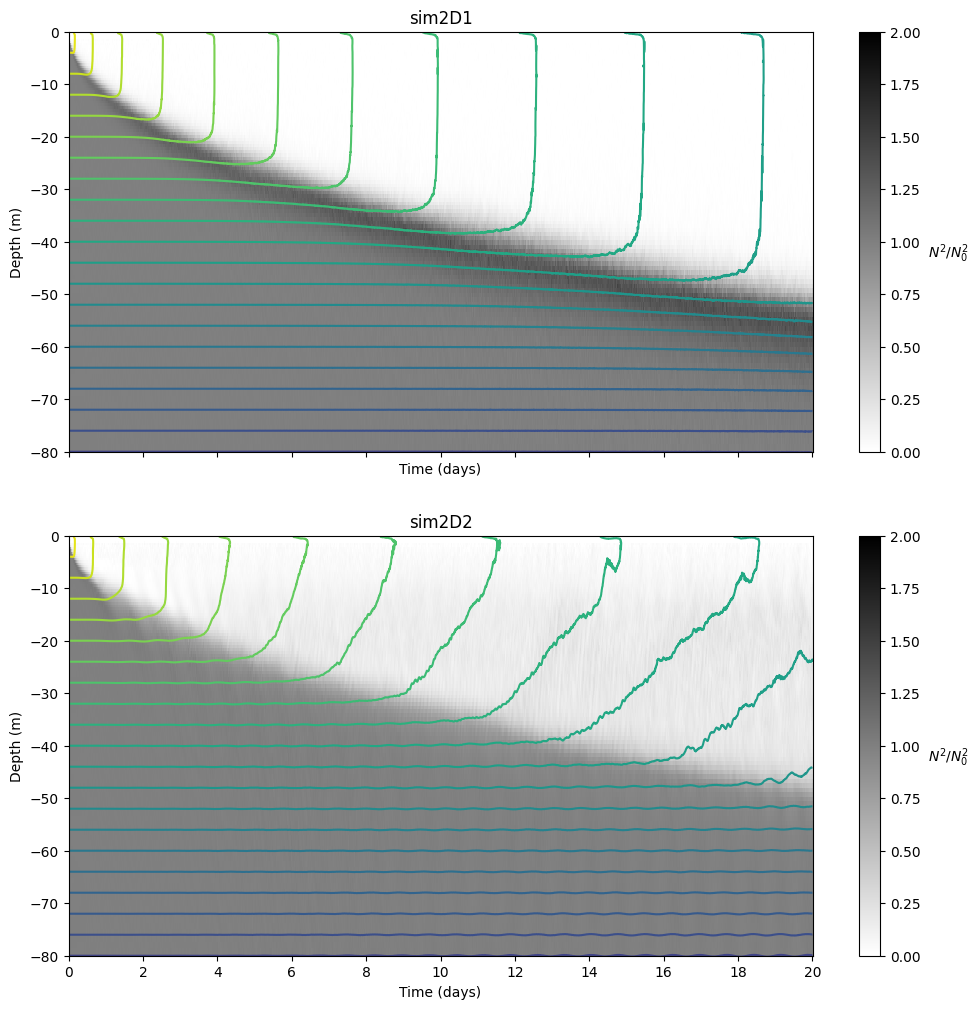

In [71]:
figure_name = "Figure 2"
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12), sharex=True)

# Plot for ds_avg1
ax1 = axes[0]

N2_1 = ds_avg1['N2']
time_1 = N2_1.coords['time'].values / np.timedelta64(1, 'D')  # Convert time to days
depth_1 = N2_1.coords['zF'].values
N2_values_1 = N2_1.values / N02

contourf_1 = ax1.pcolormesh(time_1, depth_1, N2_values_1.T, cmap='gray_r', vmin=0, vmax=2)
cbar_1 = plt.colorbar(contourf_1, ax=ax1)
cbar_1.set_label(r'$N^2 / N_0^2$', rotation=0, labelpad=20)

contour_1 = ax1.contour(time_1, ds_avg1.b.zC, ds_avg1.b[:, :].T / N02, levels=25, cmap='viridis')

ax1.set_title(f'{data_set1}')
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Depth (m)')
ax1.set_ylim(-80, 0)

# Set x-axis ticks to increments of 2 days
time_min = np.floor(time_1.min())
time_max = np.ceil(time_1.max())
ax1.set_xticks(np.arange(time_min, time_max + 2, 2))

# Plot for ds_avg2
ax2 = axes[1]
N2_2 = ds_avg2['N2']
time_2 = N2_2.coords['time'].values / np.timedelta64(1, 'D')  # Convert time to days
depth_2 = N2_2.coords['zF'].values
N2_values_2 = N2_2.values / N02

contourf_2 = ax2.pcolormesh(time_2, depth_2, N2_values_2.T, vmin=0, vmax=2, cmap='gray_r')
cbar_2 = plt.colorbar(contourf_2, ax=ax2)
cbar_2.set_label(r'$N^2 / N_0^2$', rotation=0, labelpad=20)

contour_2 = ax2.contour(ds_avg2.b.time / np.timedelta64(1, 'D'), ds_avg2.b.zC, ds_avg2.b[:, :].T / N02, levels=25, cmap='viridis')

ax2.set_title(f'{data_set2}')
ax2.set_xlabel('Time (days)')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(-80, 0)

# Set x-axis ticks to increments of 2 days
time_min = np.floor(time_2.min())
time_max = np.ceil(time_2.max())
ax2.set_xticks(np.arange(time_min, time_max + 2, 2))

# Save the figure
plt.savefig(f"images/{figure_name}.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

#  Buoyancy frequency and bulk Richardson 

## Figure 3

(a) Buoyancy frequency and (b) bulk Richardson number averaged in $x$ and for $1$ inertial period centered at $t = 15$ days.

In [76]:
# num_simulations = 6
num_simulations = [0,1,2,4,5]
figure_name = "Figure 3"

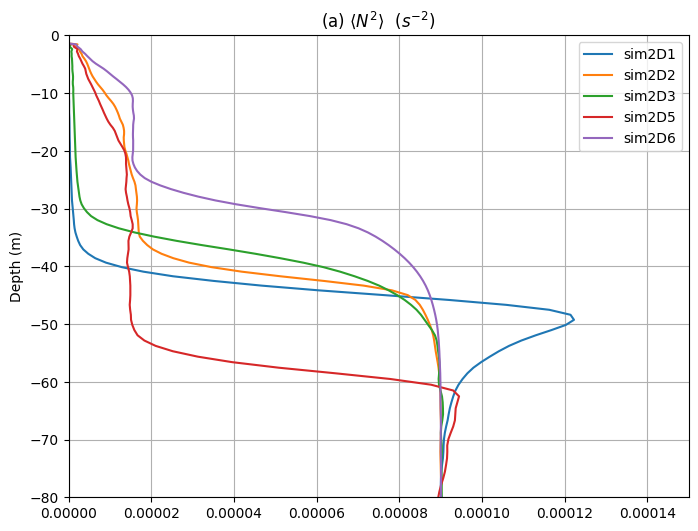

In [77]:
# Compute the mean of one inertial period centered at day 15
inertial_period_days = inertial_period / (24 * 3600)

center_day = 15
start_day = center_day - inertial_period_days / 2
end_day = center_day + inertial_period_days / 2
time_in_days = ds_avg['time'].values / np.timedelta64(1, 'D')

time_mask = (time_in_days >= start_day) & (time_in_days <= end_day)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))

for i in num_simulations:
    ds_avg = ncs[i]
    ds_selected = ds_avg.N2.isel(time=time_mask)
    ds_mean = ds_selected.mean(dim='time')
    ax.plot(ds_mean, ds_avg.zF, label=f"{cases[i]}")


ax.set_ylabel('Depth (m)')
ax.legend()
ax.set_title(f"(a) $\\left\\langle N^2 \\right\\rangle ~~ (s^{{-2}})$")
ax.grid()
ax.set_ylim(-80, 0)
ax.set_xlim(0,15e-5)

plt.savefig(f"images/{figure_name}.png", dpi=300, bbox_inches='tight')

## Buoyancy Frequency Evolution Movie

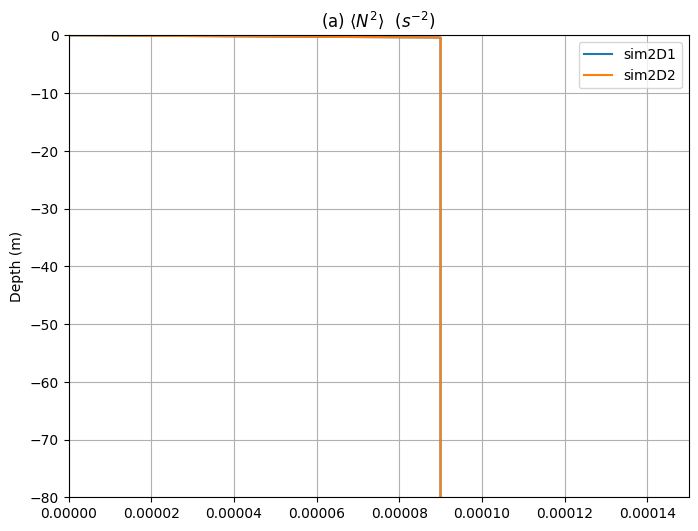

In [173]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Define a function to update the plot for each frame
def update(frame):
    ax.cla()  # Clear the current axis
    for i in range(0,num_simulations):
        ds_avg = ncs[i]
        ax.plot(ds_avg.N2.isel(time=frame), ds_avg.zF, label=f"{cases[i]}")
    
    # Convert time to days, hours, and minutes
    time_in_seconds = pd.to_timedelta(ds_avg.time[frame].values, unit='s')
    days = time_in_seconds.days
    hours, remainder = divmod(time_in_seconds.seconds, 3600)

    ax.set_ylabel('Depth (m)')
    ax.legend()
    ax.set_title(f"(a) $\\left\\langle N^2 \\right\\rangle ~~ (s^{{-2}})$ at time: {days}d {hours}h")
    ax.grid()
    ax.set_ylim(-80, 0)
    ax.set_xlim(0,15e-5)

# Create the animation object
ani = animation.FuncAnimation(fig, update, frames=len(ds_avg.time), interval=100, repeat=False)

# Save the animation as a GIF
ani.save(f'images/buoyancy-frequency-evaluation.gif', writer='pillow')

# Mean Buoyancy Budget

In [78]:
index = 0                  # 0 -> 2D1, 1 -> 2D2, ...
data_set1 = cases[index]
ds_avg1 = ncs[index]

print(f"Using data set: {data_set1}")

index = 1                  # 0 -> 2D1, 1 -> 2D2, ...
data_set2 = cases[index]
ds_avg2 = ncs[index]

print(f"Using data set: {data_set2}")

Using data set: sim2D1
Using data set: sim2D2


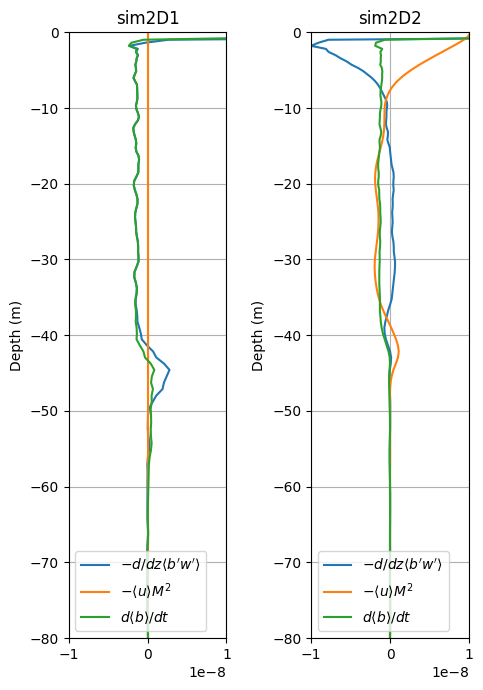

In [110]:
# Compute the mask for one inertial period centered at day 15
inertial_period_days = inertial_period / (24 * 3600)    # convert to days

center_day = 15
start_day = center_day - inertial_period_days / 2
end_day = center_day + inertial_period_days / 2
time_in_days = ds_avg['time'].values / np.timedelta64(1, 'D')

time_mask = (time_in_days >= start_day) & (time_in_days <= end_day)

ds_selected_wbdz1 = ds_avg1.wbdz.sel(time=time_mask)
ds_mean_wbdz1 = ds_selected_wbdz1.mean(dim='time')

ds_selected_uM21 = ds_avg1.uM2.sel(time=time_mask)
ds_mean_uM21 = ds_selected_uM21.mean(dim='time')

ds_selected_bdt1 = - ds_avg1.wbdz.sel(time=time_mask) - ds_avg1.uM2.sel(time=time_mask) + ds_avg1.κbdz2.sel(time=time_mask)
ds_mean_bdt1 = ds_selected_bdt1.mean(dim='time')

ds_selected_wbdz2 = ds_avg2.wbdz.sel(time=time_mask)
ds_mean_wbdz2 = ds_selected_wbdz2.mean(dim='time')

ds_selected_uM22 = ds_avg2.uM2.sel(time=time_mask)
ds_mean_uM22 = ds_selected_uM22.mean(dim='time')

ds_selected_bdt2 = - ds_avg2.wbdz.sel(time=time_mask) - ds_avg2.uM2.sel(time=time_mask) + ds_avg2.κbdz2.sel(time=time_mask)
ds_mean_bdt2 = ds_selected_bdt2.mean(dim='time')


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 7)) 
# plotting <u>
ax1 = axes[0]
ax1.plot(-ds_mean_wbdz1, ds_avg.zC, label="$-d/dz \\langle b'w' \\rangle$")
ax1.plot(-ds_mean_uM21, ds_avg.zC, label="$-\\langle u \\rangle M^2$")
ax1.plot(ds_mean_bdt1, ds_avg.zC, label="$d\\langle b \\rangle / dt$")
ax1.set_ylabel('Depth (m)')
ax1.set_ylim(-80, 0)
ax1.legend()
ax1.set_title(f"{data_set1}")
ax1.set_xlim(-1e-8,1e-8)
ax1.grid()

# plotting <v>
ax2 = axes[1]
ax2.plot(-ds_mean_wbdz2, ds_avg.zC, label="$-d/dz \\langle b'w' \\rangle$")
ax2.plot(-ds_mean_uM22, ds_avg.zC, label="$-\\langle u \\rangle M^2$")
ax2.plot(ds_mean_bdt2, ds_avg.zC, label="$d\\langle b \\rangle / dt$")
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(-80, 0)
ax2.legend()
ax2.set_xlim(-1e-8,1e-8)
ax2.set_title(f"{data_set2}")
ax2.grid()


plt.tight_layout()
plt.show()

# Mean Velocities and Turbulent Ekman Balance

$$\begin{align*} f\langle u \rangle &\backsimeq - \frac{\partial \langle v^\prime w^\prime \rangle}{\partial z} + \nu \frac{\partial^2 \langle v \rangle}{\partial z^2} \\ -f\langle v \rangle &\backsimeq - \frac{\partial \langle u^\prime w^\prime \rangle}{\partial z} + \nu \frac{\partial^2 \langle u \rangle}{\partial z^2} \end{align*}$$

## Figure 5

Simulation 2D2: (a) Mean cross-front velocity, (b) mean alongfront velocity, and (c) hodograph of the mean velocity vectors (all m s−1). All quantities are averaged in x and for 1 inertial period centered at t = 15 days.

In [117]:
index = 1                  # 0 -> 2D1, 1 -> 2D2, ...
data_set = cases[index]
ds_avg = ncs[index]

print(f"Using data set: {data_set}")

Using data set: sim2D2


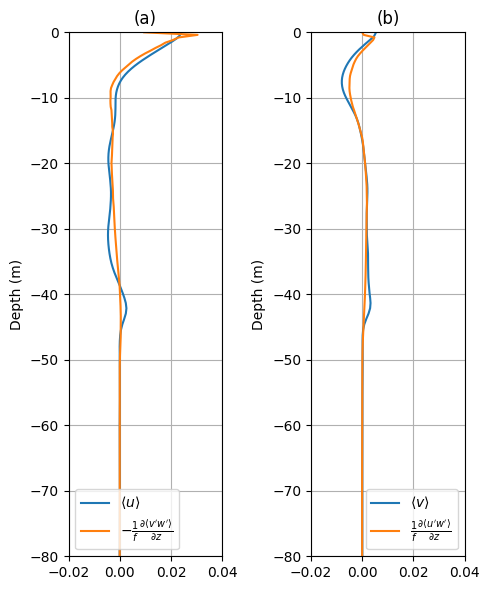

In [144]:
# Compute the mask for one inertial period centered at day 15
inertial_period_days = inertial_period / (24 * 3600)    # convert to days

center_day = 15
start_day = center_day - inertial_period_days / 2
end_day = center_day + inertial_period_days / 2
time_in_days = ds_avg['time'].values / np.timedelta64(1, 'D')

time_mask = (time_in_days >= start_day) & (time_in_days <= end_day)

ds_selected_u = ds_avg.u.sel(time=time_mask)
ds_mean_u = ds_selected_u.mean(dim='time')

ds_selected_fivw = ds_avg['fivw′dz'].sel(time=time_mask)
ds_mean_fivw = ds_avg['fivw′dz'].mean(dim='time')


ds_selected_v = ds_avg.v.sel(time=time_mask)
ds_mean_v = ds_selected_v.mean(dim='time')

ds_selected_fiuw = ds_avg['fiuw′dz'].sel(time=time_mask)
ds_mean_fiuw = ds_avg['fiuw′dz'].mean(dim='time')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 6), sharex=True) 
# plotting <u>
ax1 = axes[0]
ax1.plot(ds_mean_u, ds_avg.zC, label="$\\langle u \\rangle$")
ax1.plot(-ds_mean_fivw, ds_mean_fivw.zF, label="$-\\frac{1}{f}\\frac{\\partial \\langle v' w' \\rangle}{\\partial z}$")
ax1.set_ylabel('Depth (m)')
ax1.set_ylim(-80, 0)
ax1.set_xlim(-0.02, 0.04)
ax1.legend()
ax1.set_title("(a)")
ax1.grid()

# plotting <v>
ax2 = axes[1]
ax2.plot(ds_mean_v, ds_avg.zC, label="$\\langle v \\rangle$")
ax2.plot(ds_mean_fiuw, ds_mean_fiuw.zF, label="$\\frac{1}{f}\\frac{\\partial \\langle u' w' \\rangle}{\\partial z}$")
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(-80, 0)
ax1.set_xlim(-0.02, 0.04)
ax2.legend()
ax2.set_title("(b)")
ax2.grid()


plt.tight_layout()
plt.show()

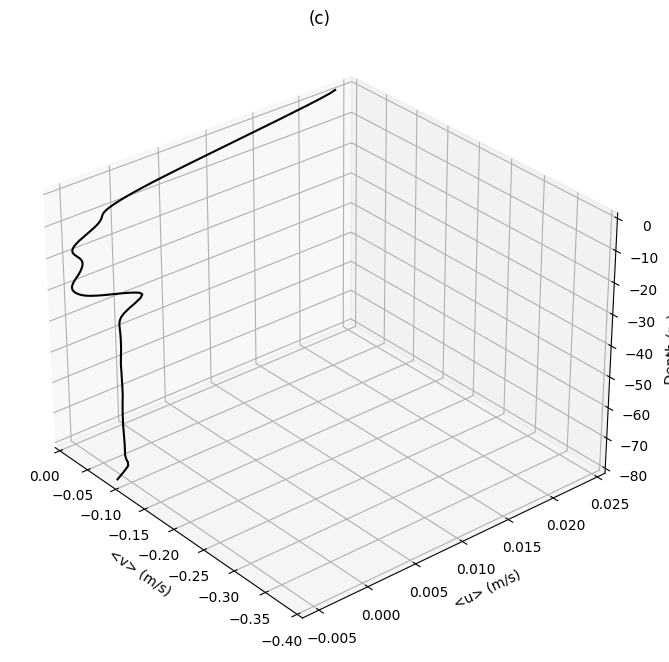

In [147]:
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot(ds_mean_v,ds_mean_u, ds_avg.zC, color='black')

ax.set_ylabel('<u> (m/s)')
ax.set_xlabel('<v> (m/s)')
ax.set_zlabel('Depth (m)')
ax.set_zlim(-80, 0)
ax.set_xlim(0,-0.4)
ax.set_title("(c)")
ax.view_init(elev=30, azim=-40)

plt.show()

## Mean Velocities Evolution Movie

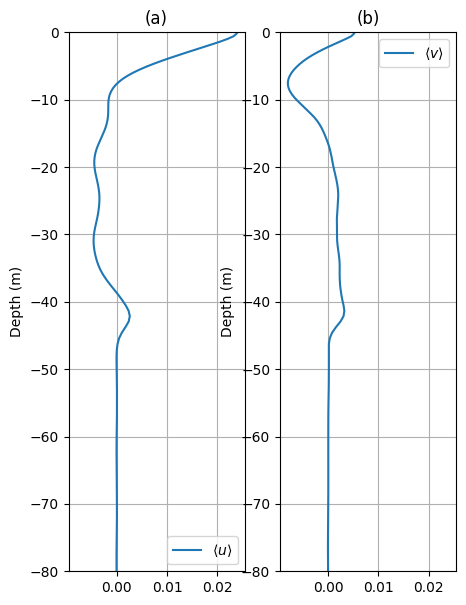

In [149]:
# Create a figure and axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 7), sharex=True) 

# Define a function to update the plot for each frame
def update(frame):
    # plotting <u>
    ax1 = axes[0]
    ax1.cla()  # Clear the current axis
    ax1.plot(ds_mean_u, ds_avg.zC, label="$\langle u \\rangle$")
    ax1.set_ylabel('Depth (m)')
    ax1.set_ylim(-80, 0)
    ax1.legend()
    ax1.set_title("(a)")
    ax1.grid()

    # plotting <v>
    ax2 = axes[1]
    ax2.cla()  # Clear the current axis    
    ax2.plot(ds_mean_v, ds_avg.zC, label="$\langle v \\rangle$")
    ax2.set_ylabel('Depth (m)')
    ax2.set_ylim(-80, 0)
    ax2.legend()
    ax2.set_title("(b)")
    ax2.grid()
    
    # Convert time to days, hours, and minutes
    time_in_seconds = pd.to_timedelta(ds_avg.time[frame].values, unit='s')
    days = time_in_seconds.days
    hours, remainder = divmod(time_in_seconds.seconds, 3600)

    # fig.title(f"t = {days}d {hours}h")

# Create the animation object
ani = animation.FuncAnimation(fig, update, frames=len(ds_avg.time), interval=100, repeat=False)

# Save the animation as a GIF
ani.save(f'images/mean-velocity-evaluation.gif', writer='pillow')

# Mean PV

$$\langle q \rangle = f \frac{\partial \langle b \rangle}{\partial z} + \frac{\partial}{\partial z}\langle \zeta^\prime b^\prime \rangle - M^2 \frac{\partial \langle v_T \rangle}{\partial z}

In [150]:
num_simulations = [0,1,2,4,5]
figure_name = "mean_pv"

In [151]:
index = 1                  # 0 -> 2D1, 1 -> 2D2, ...
data_set = cases[index]
ds_avg = ncs[index]

print(f"Using data set: {data_set}")

Using data set: sim2D2


In [171]:
print(ds_avg.fbdz)

<xarray.DataArray 'fbdz' (time: 5761, zC: 128)> Size: 6MB
array([[-8.93627670e-07, -8.80952280e-07, -8.68414633e-07, ...,
        -8.81636436e-09, -5.26737400e-09, -1.75047419e-09],
       [-8.93550109e-07, -8.81028582e-07, -8.68415217e-07, ...,
        -8.82998615e-09, -5.58195116e-09, -5.38494160e-09],
       [-8.93491034e-07, -8.81085413e-07, -8.68418866e-07, ...,
        -8.93251353e-09, -6.37202338e-09, -8.43672797e-09],
       ...,
       [-8.87501086e-07, -8.80590026e-07, -8.69661657e-07, ...,
        -3.74334062e-07, -3.74882478e-07, -3.79374928e-07],
       [-8.87468887e-07, -8.80568960e-07, -8.69635172e-07, ...,
        -3.74272293e-07, -3.74796532e-07, -3.79359652e-07],
       [-8.87440732e-07, -8.80551354e-07, -8.69637000e-07, ...,
        -3.74267616e-07, -3.74844739e-07, -3.79362042e-07]])
Coordinates:
  * zC       (zC) float64 1kB -99.29 -97.88 -96.49 ... -0.9796 -0.5853 -0.1945
  * time     (time) timedelta64[ns] 46kB 00:00:00 00:05:00 ... 20 days 00:00:00


In [170]:
#ds_avg.fbdz + ds_avg.M2mvtdz #+ ds_avg["ζb′"]
ds_avg.M2mvtdz + ds_avg["ζb′"] 

<xarray.DataArray (time: 5761, zF: 129)> Size: 6MB
array([[ 1.79776000e-09,  1.79792843e-09,  1.79956884e-09, ...,
         1.78990787e-09,  1.81794335e-09,  1.79776000e-09],
       [ 1.79776000e-09,  1.77551481e-09,  1.81447780e-09, ...,
         1.80975579e-09,  1.78081385e-09,  1.79776000e-09],
       [ 1.79776000e-09,  1.74954380e-09,  1.82510571e-09, ...,
         1.82032403e-09,  1.75662514e-09,  1.79776000e-09],
       ...,
       [ 1.79776000e-09,  1.24652056e-09,  1.93691550e-09, ...,
         4.32821412e-11,  1.15312915e-08,  1.79776000e-09],
       [ 1.79776000e-09,  1.23561157e-09,  1.95202386e-09, ...,
        -9.48249725e-10,  1.00675700e-08,  1.79776000e-09],
       [ 1.79776000e-09,  1.24469644e-09,  1.96482084e-09, ...,
        -7.49913968e-10,  7.95894658e-09,  1.79776000e-09]])
Coordinates:
  * zF       (zF) float64 1kB -100.0 -98.58 -97.18 -95.8 ... -0.7815 -0.389 0.0
  * time     (time) timedelta64[ns] 46kB 00:00:00 00:05:00 ... 20 days 00:00:00

In [164]:
ds_q_avg = ds_avg.fbdz + ds_avg["ζb′"] + ds_avg.M2mvtdz 
time = ds_q_avg.coords['time'].values / np.timedelta64(1, 'D')  # Convert time to days
print(ds_q_avg)
# contourf_1 = ax1.pcolormesh(time_1, depth_1, ds_q_avg.T, cmap='gray_r')
# cbar_1 = plt.colorbar(contourf_1, ax=ax1)

# N2_1 = ds_avg1['N2']
# depth_1 = N2_1.coords['zF'].values
# N2_values_1 = N2_1.values / N02

<xarray.DataArray (time: 5761, zC: 128, zF: 129)> Size: 761MB
array([[[-8.91829910e-07, -8.91829741e-07, -8.91828101e-07, ...,
         -8.91837762e-07, -8.91809726e-07, -8.91829910e-07],
        [-8.79154520e-07, -8.79154352e-07, -8.79152711e-07, ...,
         -8.79162372e-07, -8.79134337e-07, -8.79154520e-07],
        [-8.66616873e-07, -8.66616705e-07, -8.66615065e-07, ...,
         -8.66624725e-07, -8.66596690e-07, -8.66616873e-07],
        ...,
        [-7.01860436e-09, -7.01843593e-09, -7.01679552e-09, ...,
         -7.02645649e-09, -6.99842102e-09, -7.01860436e-09],
        [-3.46961400e-09, -3.46944558e-09, -3.46780516e-09, ...,
         -3.47746613e-09, -3.44943066e-09, -3.46961400e-09],
        [ 4.72858081e-11,  4.74542369e-11,  4.90946510e-11, ...,
          3.94336804e-11,  6.74691535e-11,  4.72858081e-11]],

       [[-8.91752349e-07, -8.91774594e-07, -8.91735631e-07, ...,
         -8.91740353e-07, -8.91769295e-07, -8.91752349e-07],
        [-8.79230822e-07, -8.79253067e-07